# STOCK MARKET PREDICTION AND FORECASTING USING LSTM
 


In [ ]:
#Keras and Tensorflow>>

In [ ]:
import pandas_datareader as pdr
key=""

In [16]:
df=pdr.get_data_tiingo('AAPL', api_key=key)


C:\Users\Abhishek Saha\AppData\Local\Temp\ipykernel_21412\2102904414.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df=pdr.get_data_tiingo('AAPL', api_key=key)


In [17]:
df.to_csv('AAPL.csv')

In [18]:
import pandas as pd

In [19]:
df=pd.read_csv('AAPL.csv')

In [20]:

df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-10-01 00:00:00+00:00,227.26,229.42,226.35,227.95,23600802,54.409645,54.926783,54.191776,54.574842,94403208,0.0,1.0
1,AAPL,2018-10-02 00:00:00+00:00,229.28,230.00,226.63,227.25,24788170,54.893265,55.065644,54.258813,54.407251,99152680,0.0,1.0
2,AAPL,2018-10-03 00:00:00+00:00,232.07,233.47,229.78,230.05,28654799,55.561235,55.896417,55.012973,55.077615,114619196,0.0,1.0
3,AAPL,2018-10-04 00:00:00+00:00,227.99,232.35,226.73,230.78,32042000,54.584418,55.628272,54.282754,55.252389,128168000,0.0,1.0
4,AAPL,2018-10-05 00:00:00+00:00,224.29,228.41,220.58,227.96,33580463,53.698580,54.684973,52.810347,54.577236,134321852,0.0,1.0


In [21]:

df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2023-09-22 00:00:00+00:00,174.79,177.079,174.05,174.67,56725385,174.79,177.079,174.05,174.67,56725385,0.0,1.0
1253,AAPL,2023-09-25 00:00:00+00:00,176.08,176.970,174.15,174.20,46172740,176.08,176.970,174.15,174.20,46172740,0.0,1.0
1254,AAPL,2023-09-26 00:00:00+00:00,171.96,175.200,171.66,174.82,64588945,171.96,175.200,171.66,174.82,64588945,0.0,1.0
1255,AAPL,2023-09-27 00:00:00+00:00,170.43,173.040,169.05,172.62,66921808,170.43,173.040,169.05,172.62,66921808,0.0,1.0
1256,AAPL,2023-09-28 00:00:00+00:00,170.69,172.030,167.62,169.34,56139626,170.69,172.030,167.62,169.34,56139626,0.0,1.0


In [22]:
df1=df.reset_index()['close']

In [23]:
df1


0       227.26
1       229.28
2       232.07
3       227.99
4       224.29
         ...  
1252    174.79
1253    176.08
1254    171.96
1255    170.43
1256    170.69
Name: close, Length: 1257, dtype: float64

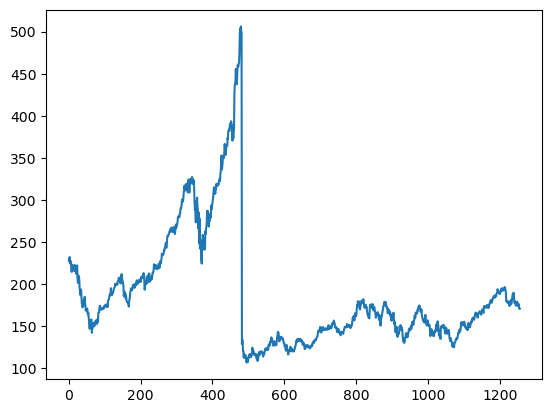

In [24]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [25]:
### LSTM are sensitive to the scale of the data. so we apply MinMax s

In [26]:
import numpy as np

In [27]:
df1

0       227.26
1       229.28
2       232.07
3       227.99
4       224.29
         ...  
1252    174.79
1253    176.08
1254    171.96
1255    170.43
1256    170.69
Name: close, Length: 1257, dtype: float64

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [29]:
print(df1)

[[0.30161553]
 [0.30667502]
 [0.31366312]
 ...
 [0.16310582]
 [0.15927364]
 [0.15992486]]


In [31]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [32]:
training_size,test_size

(817, 440)

In [33]:
train_data


array([[3.01615529e-01],
       [3.06675016e-01],
       [3.13663118e-01],
       [3.03443957e-01],
       [2.94176581e-01],
       [2.92874139e-01],
       [3.00638698e-01],
       [2.74314339e-01],
       [2.69530369e-01],
       [2.88716343e-01],
       [2.76819036e-01],
       [2.88816531e-01],
       [2.86412023e-01],
       [2.73462743e-01],
       [2.81703193e-01],
       [2.85059487e-01],
       [2.90269255e-01],
       [2.71133375e-01],
       [2.82930495e-01],
       [2.74164058e-01],
       [2.63994991e-01],
       [2.66649969e-01],
       [2.80576080e-01],
       [2.88991860e-01],
       [2.52072636e-01],
       [2.37319975e-01],
       [2.42780213e-01],
       [2.58259236e-01],
       [2.54602379e-01],
       [2.44533500e-01],
       [2.18735128e-01],
       [2.13876018e-01],
       [2.00275517e-01],
       [2.11822167e-01],
       [2.17132123e-01],
       [1.97921102e-01],
       [1.75679399e-01],
       [1.75178460e-01],
       [1.63932373e-01],
       [1.69768316e-01],


In [34]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [35]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [36]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [37]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [38]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [39]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [40]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 20s 600ms/step - loss: 0.0272 - val_loss: 5.5734e-04
Epoch 2/100
12/12 [==============================] - 5s 384ms/step - loss: 0.0135 - val_loss: 0.0011
Epoch 3/100
12/12 [==============================] - 5s 390ms/step - loss: 0.0105 - val_loss: 5.2853e-04
Epoch 4/100
12/12 [==============================] - 5s 393ms/step - loss: 0.0093 - val_loss: 0.0011
Epoch 5/100
12/12 [==============================] - 5s 425ms/step - loss: 0.0085 - val_loss: 3.8590e-04
Epoch 6/100
12/12 [==============================] - 5s 385ms/step - loss: 0.0076 - val_loss: 5.0292e-04
Epoch 7/100
12/12 [==============================] - 5s 414ms/step - loss: 0.0067 - val_loss: 5.7618e-04
Epoch 8/100
12/12 [==============================] - 4s 372ms/step - loss: 0.0062 - val_loss: 5.1554e-04
Epoch 9/100
12/12 [==============================] - 4s 373ms/step - loss: 0.0056 - val_loss: 0.0016
Epoch 10/100
12/12 [==============================] - 4s 370ms/ste

In [44]:
import tensorflow as tf

In [45]:
tf.__version__

'2.13.0'

In [46]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 49ms/step


In [47]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [48]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

219.80673062948134

In [49]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

159.96365620468666

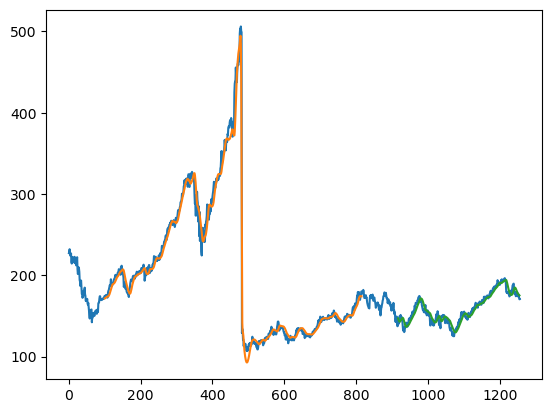

In [50]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [51]:
len(test_data)

440

In [52]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [53]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [54]:
temp_input

[0.16262993112085156,
 0.16710081402629928,
 0.16758922980588598,
 0.16463368816530988,
 0.1633813400125234,
 0.1633813400125234,
 0.16493425172197868,
 0.17084533500313087,
 0.17112085159674384,
 0.1687163431433938,
 0.16210394489668123,
 0.16280525986224165,
 0.1656856606136506,
 0.17179711959924854,
 0.17648090169067,
 0.17635566687539134,
 0.1834690043832185,
 0.1856230432060112,
 0.18219160926737632,
 0.18126487163431432,
 0.1777833437695679,
 0.18467125860989347,
 0.18564809016906697,
 0.19273638071383836,
 0.1915341264871634,
 0.19313713212273004,
 0.19829680651221032,
 0.1955666875391358,
 0.1957921102066374,
 0.1931621790857858,
 0.2007764558547276,
 0.19997495303694424,
 0.19644333124608637,
 0.2034314339386349,
 0.2064120225422667,
 0.2072636192861615,
 0.21823418910457104,
 0.21445209768315587,
 0.21162179085785848,
 0.21282404508453345,
 0.20999373825923606,
 0.20480901690670006,
 0.20348152786474638,
 0.20771446462116466,
 0.20964308077645577,
 0.21001878522229173,
 0.218

In [56]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [57]:
import matplotlib.pyplot as plt

In [58]:
len(df1)

1257

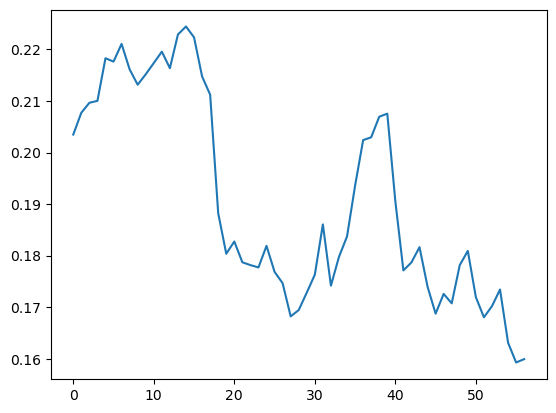

In [60]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [61]:
df3=scaler.inverse_transform(df3).tolist()

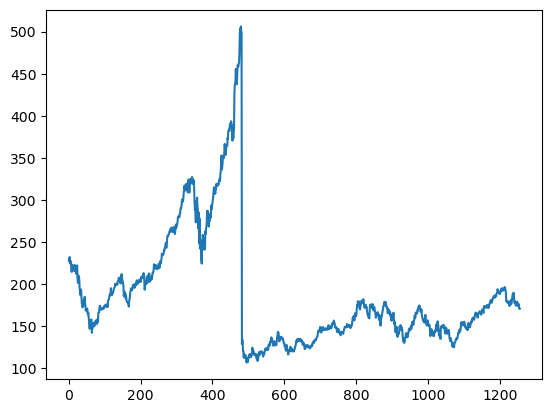

In [62]:
plt.plot(df3)